<a href="https://colab.research.google.com/github/ShreyD06/Drought-Shield/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#RUN THIS FOR DATA
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-shreyderdesai')

In [ ]:
#RUN THIS FOR DATA
lst = ee.ImageCollection('MODIS/061/MOD11A2')

ndvi = ee.ImageCollection('MODIS/061/MOD13A1')

# Initial date of interest (inclusive).
i_date = '2000-02-24'

# Final date of interest (exclusive).
f_date = '2023-11-18'

# Selection of appropriate bands and dates for LST.
lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(i_date, f_date)
ndvi = ndvi.select('NDVI', "DetailedQA").filterDate(i_date, f_date)

In [ ]:
import pandas as pd
import numpy as np
u_lon = -116.5
u_lat = 33
u_poi = ee.Geometry.Point(u_lon, u_lat)
ndvi_data = np.zeros(shape=(546, 121, 4))
lst_data = np.zeros(shape=(546, 121))


#They have 1 more timestep than et because of the bad index 502 timestep

In [ ]:


point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    u_poi = ee.Geometry.Point(-116.5+(lon*0.15), 33+(lat*0.15))
    arr = np.array(ndvi.getRegion(u_poi, 500).getInfo())
    point += 1
    for i in range(1, 547):
      ndvi_data[i-1][point-1] = arr[i][1:5]




In [ ]:
#RUN THIS FOR DATA
import pandas as pd
import numpy as np
u_lon = -122
u_lat = 39.5
u_poi = ee.Geometry.Point(u_lon, u_lat)
ndvi_data = np.zeros(shape=(546, 121, 4))
lst_data = np.zeros(shape=(546, 121))
#They have 1 more timestep than et because of the bad index 502 timestep

In [ ]:
#RUN THIS FOR DATA
point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    u_poi = ee.Geometry.Point(-122+(lon*0.15), 39.5+(lat*0.15))
    arr = np.array(ndvi.getRegion(u_poi, 500).getInfo())
    point += 1
    for i in range(1, 547):
      ndvi_data[i-1][point-1] = arr[i][1:5]

In [ ]:
#RUN THIS FOR DATA
ndvi_data = np.delete(ndvi_data, (456, 457), axis=0)
ndvi_data.shape

In [ ]:
# print(ndvi_data[0][16])


# for i in range(len(ndvi_data)):
#   print(sum(np.isnan(ndvi_data[i,:,3])))
np.sum(np.isnan(ndvi_data[:,:,3]), axis=1)

array([0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1,
       2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [ ]:
#RUN THIS FOR DATA
ndvi_means = np.nanmean(ndvi_data[:, :, 3], axis=1)
ndvi_means = ndvi_means*0.0001
len(ndvi_means)

544

In [ ]:
point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
        u_poi = ee.Geometry.Point(-116.5+(lon*0.15), 33+(lat*0.15))
        arr2 = np.array(lst.getRegion(u_poi, 1000).getInfo())
        point += 1
        for i in range(1, 547):
          if i >= 31:
            lst_data[i-1][point-1] = arr2[2*i-2][4]
          else:
            lst_data[i-1][point-1] = arr2[(2*i)-1][4]


In [ ]:
#RUN THIS FOR DATA
point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
        u_poi = ee.Geometry.Point(-122+(lon*0.15), 39.5+(lat*0.15))
        arr2 = np.array(lst.getRegion(u_poi, 1000).getInfo())
        point += 1
        for i in range(1, 547):
          if i >= 31:
            lst_data[i-1][point-1] = arr2[2*i-2][4]
          else:
            lst_data[i-1][point-1] = arr2[(2*i)-1][4]


In [ ]:
#RUN THIS FOR DATA
lst_data = np.delete(lst_data, (456, 457), axis=0)
lst_data.shape

(544, 121)

In [ ]:
np.sum(np.isnan(lst_data), axis=1)

array([ 2,  0,  0,  7,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0, 19,
        0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  4, 44,  2, 84,  0,  0,  0,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 66, 76, 18, 31,
        0,  0,  1,  0,  2, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  2, 27,  7,  2,  0, 24,  0,  0, 55,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  8,  0,  0, 37,  3,  0,  4,  0,  1,  0,  0,
       43,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 33,  3, 95,  1,
       81,  0, 31, 27, 75,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  7,  0, 52,  0,  0,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 57,  2,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 29

In [ ]:
#RUN THIS FOR DATA
nlst_data = np.zeros(shape = (544, 121))
for i, lsts in enumerate(lst_data):
  df = pd.DataFrame(lsts)
  nlst_data[i] = df.interpolate().to_numpy().reshape((121,))

In [ ]:
nlst_data[0]

array([14590. , 14611. , 14596. , 14696. , 14347. , 14292. , 14212. ,
       14197. , 13878. , 13812. , 13787. , 14579. , 14616. , 14689. ,
       14493. , 14183. , 14385. , 13968. , 13836. , 13823. , 13683. ,
       13771. , 14649. , 14704. , 14632. , 14429. , 14163. , 13918. ,
       14083. , 13872. , 13760. , 13946. , 13958. , 14606. , 14675. ,
       14321. , 13992. , 13820. , 14052. , 13787. , 14166. , 14006. ,
       13699. , 13813. , 14609. , 14630. , 14501. , 13902. , 13581. ,
       13861. , 14021. , 13870. , 14123. , 14030. , 13940. , 14625. ,
       14585. , 14232. , 13869. , 13773. , 13814. , 13731. , 13808. ,
       13802. , 13809. , 13954. , 14659. , 14653. , 13838. , 13674. ,
       13714. , 13761. , 13693. , 13753. , 14036.5, 14320. , 14427. ,
       14588. , 14330. , 13978. , 13705. , 13672. , 13680. , 13757. ,
       13764. , 13880. , 14171. , 14380. , 14589. , 14323. , 13864. ,
       13697. , 13989. , 13760. , 13781. , 13663. , 13887. , 13917. ,
       14263. , 1444

In [ ]:
#RUN THIS FOR DATA
lst_means = np.nanmean(nlst_data[:, :], axis=1)
lst_means = lst_means*0.02
len(lst_means)

544

In [ ]:

lst_u_poi = lst.getRegion(u_poi, 1000).getInfo()
ndvi_u_poi = ndvi.getRegion(u_poi, 500).getInfo()
# arr = np.array(ndvi_u_poi)

# print(arr.shape)
# print(arr[1])
df = pd.DataFrame(lst_u_poi)

df2 = pd.DataFrame(ndvi_u_poi)
df2
# headers = df.iloc[0]
# df = pd.DataFrame(df.values[2:], columns=headers)


# headers = df2.iloc[0]
# df2 = pd.DataFrame(df2.values[1:], columns=headers)
# df


# df = pd.DataFrame(otherndvi)
# df

# print(df.shape)
# print(df['id'][58], df2['id'][29])
# for i in range(0, 546):
#   if i >= 30:
#     print(df['id'][2*i-1], df2['id'][i])
#   else:
#     print(df['id'][2*i], df2['id'][i])

  # if df['id'][2*i] != df2['id'][i]:
  #   print(df['id'][2*i], df2['id'][i], i)
#CONCLUSION: At 30, switch from being 2i to 2i-1

# df = df.dropna()

# print(df.shape)

# df

,0,1,2,3,4,5
0,id,longitude,latitude,time,NDVI,DetailedQA
1,2000_03_05,-116.500263,33.001858,952214400000,4265,2116
2,2000_03_21,-116.500263,33.001858,953596800000,4211,2116
3,2000_04_06,-116.500263,33.001858,954979200000,4160,2116
4,2000_04_22,-116.500263,33.001858,956361600000,4633,2116
...,...,...,...,...,...,...
542,2023_09_14,-116.500263,33.001858,1694649600000,4391,2116
543,2023_09_30,-116.500263,33.001858,1696032000000,4177,2116
544,2023_10_16,-116.500263,33.001858,1697414400000,4650,2116
545,2023_11_01,-116.500263,33.001858,1698796800000,4560,2116


In [ ]:
et1 = ee.ImageCollection("MODIS/061/MOD16A2GF")
et1 = et1.select("ET", "PET", "ET_QC").filterDate('2022-11-20', '2022-11-26')
chgpoints = []
chgcoords = []

point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    u_poi = ee.Geometry.Point(-122+(lon*0.15), 39.5+(lat*0.15))
    if et1.getRegion(u_poi, 500).getInfo()[1][4] == None:
      chgpoints.append(point)
      chgcoords.append((lat, lon))
    point += 1

# Conclusion: Add slightly diferrent coordinates for these 3 values

In [ ]:
chgpoints

[3, 23, 61, 85]

In [ ]:
et1 = ee.ImageCollection("MODIS/061/MOD16A2GF")
et1 = et1.select("ET", "PET", "ET_QC").filterDate('2000-03-01', '2023-11-18')
df = pd.DataFrame(et1.getRegion(u_poi, 500).getInfo())
df

,0,1,2,3,4,5,6
0,id,longitude,latitude,time,ET,PET,ET_QC
1,2000_03_05,-120.497766,41.001355,952214400000,109,171,8
2,2000_03_13,-120.497766,41.001355,952905600000,63,320,8
3,2000_03_21,-120.497766,41.001355,953596800000,56,352,0
4,2000_03_29,-120.497766,41.001355,954288000000,29,437,0
...,...,...,...,...,...,...,...
1046,2022_11_25,-120.497766,41.001355,1669334400000,67,140,16
1047,2022_12_03,-120.497766,41.001355,1670025600000,51,53,105
1048,2022_12_11,-120.497766,41.001355,1670716800000,37,39,97
1049,2022_12_19,-120.497766,41.001355,1671408000000,36,39,73


In [ ]:
et1 = ee.ImageCollection("MODIS/061/MOD16A2GF")
et1 = et1.select("ET", "PET", "ET_QC").filterDate('2010-12-20', '2010-12-28')

point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    u_poi = ee.Geometry.Point(-116.5+(lon*0.15), 33+(lat*0.15))
    arr = np.array(et1.getRegion(u_poi, 500).getInfo())
    print(arr[1])


['2010_12_27' '-116.50026340925045' '33.001857750340925' '1293408000000'
 '28' '137' '0']
['2010_12_27' '-116.35204138737073' '33.001857750340925' '1293408000000'
 '27' '157' '0']
['2010_12_27' -116.19932778907041 33.001857750340925 1293408000000 None
 None 157]
['2010_12_27' '-116.05110576719069' '33.001857750340925' '1293408000000'
 '26' '176' '8']
['2010_12_27' -115.89839216889037 33.001857750340925 1293408000000 None
 None 157]
['2010_12_27' -115.75017014701065 33.001857750340925 1293408000000 None
 None 157]
['2010_12_27' '-115.60194812513093' '33.001857750340925' '1293408000000'
 '63' '104' '0']
['2010_12_27' '-115.44923452683061' '33.001857750340925' '1293408000000'
 '21' '177' '16']
['2010_12_27' -115.30101250495089 33.001857750340925 1293408000000 None
 None 157]
['2010_12_27' -115.14829890665057 33.001857750340925 1293408000000 None
 None 157]
['2010_12_27' -115.00007688477085 33.001857750340925 1293408000000 None
 None 157]
['2010_12_27' '-116.50026340925045' '33.15007977222

In [ ]:
# unique_values = df['id'].unique()
# print(unique_values)

chgcoords
print(len(chgcoords))

oc = []
ocpoints = []
point = 0
count = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    if (lat, lon) in chgcoords:
      #Original: +0.1
      u_poi = ee.Geometry.Point(-116.5+(lon*0.15)+0.07, 33+(lat*0.15)+0.05)
      if et1.getRegion(u_poi, 500).getInfo()[1][4] == None:
        oc.append((lat, lon))
        ocpoints.append(point)
        count += 1
    point += 1

print(count)



61
34


In [ ]:
for lat in range(0, 11):
  for lon in range(0, 11):
    if (lat, lon) not in oc and (lat, lon) in chgcoords:
      u_poi = ee.Geometry.Point(-116.5+(lon*0.15)+0.07, 33+(lat*0.15)+0.05)
    else:
      u_poi = ee.Geometry.Point(-116.5+(lon*0.15), 33+(lat*0.15))
    arr = np.array(et1.getRegion(u_poi, 500).getInfo())
    print(arr[1][4])

In [ ]:
#RUN THIS FOR DATA
et1 = ee.ImageCollection("MODIS/061/MOD16A2GF")
et1 = et1.select("ET", "PET", "ET_QC").filterDate(i_date, '2023-01-01')

et1_data = np.zeros(shape=(525, 121, 2))

# for lat in range(0, 11):
#   for lon in range(0, 11):
#     u_poi = ee.Geometry.Point(-116.5+(lon*0.15), 33+(lat*0.15))
#     arr = np.array(et1.getRegion(u_poi, 500).getInfo())


point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
        u_poi = ee.Geometry.Point(-122+(lon*0.15), 39.5+(lat*0.15))
        arr3 = np.array(et1.getRegion(u_poi, 500).getInfo())
        point += 1
        for i in range(1, 526):
          et1_data[i-1][point-1] = arr3[(2*i)][4:6]



# df = pd.DataFrame(et1.getRegion(ee.Geometry.Point(-116.5, 33), 500).getInfo())

# headers = df.iloc[0]
# df = pd.DataFrame(df.values[2:], columns=headers)


# ndvi2 = ndvi.select('NDVI', "DetailedQA").filterDate(i_date, '2023-01-01')
# df2 = pd.DataFrame(ndvi2.getRegion(ee.Geometry.Point(-116.5, 33), 500).getInfo())
# headers = df2.iloc[0]
# df2 = pd.DataFrame(df2.values[1:], columns=headers)

# df2




In [ ]:

# arr = np.array(et1.getRegion(u_poi, 500).getInfo())
# print(arr)

print(et1_data[0])
#IF CELL BELOW DOESN'T WORK: In separate cell, get the alternate values by making a new array with points that are not in ocpoints but in chgpoints. Loop through array and get the values for the coordinates there (shape: (point, timesteps, ET + PET))

In [ ]:
mcp = []
point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    if point not in ocpoints and point in chgpoints:
      mcp.append(point)
    point += 1
print(len(mcp))

27


In [ ]:
for point in mcp:

  u_poi = ee.Geometry.Point(-116.5+((point%11)*0.15)+0.07, 33+((point//11)*0.15)+0.05)
  arr = np.array(et1.getRegion(u_poi, 500).getInfo())
  et1_data[:, point] = [arr[x][4:6] for x in range(2, 1051, 2)]

In [ ]:
print(et1_data[0])

In [ ]:
# for time in et1_data:
#   sum = 0
#   for coord in et1_data:
#     if np.isnan(coord[0])
non_empty_mask = ~np.isnan(et1_data[:, :, 0]).all(axis=1)
et_mean_per_timestep = np.nanmean(et1_data[non_empty_mask, :, 0], axis=1)
print(len(et_mean_per_timestep))

for index, m in enumerate(et_mean_per_timestep):
  if np.isnan(m):
    print(index)

525


In [ ]:
#RUN THIS FOR DATA
et1_data = np.delete(et1_data, (456, 457), axis=0)


In [ ]:
print(et1_data.shape)

(523, 121, 2)


In [ ]:
for i in range(len(et_mean_per_timestep)):
    # Find NaN values in the ET values for the i-th timestep
    nan_mask = np.isnan(et1_data[i, :, 0])

    # Replace NaN values with the corresponding mean from et_mean_per_timestep
    val = round(et_mean_per_timestep[i])
    et1_data[i, nan_mask, 0] = val

In [ ]:
pet_mean_per_timestep = np.nanmean(et1_data[:, :, 1], axis=1)

for i in range(len(pet_mean_per_timestep)):
    # Find NaN values in the ET values for the i-th timestep
    nan_mask = np.isnan(et1_data[i, :, 1])

    # Replace NaN values with the corresponding mean from et_mean_per_timestep
    val = round(pet_mean_per_timestep[i])
    et1_data[i, nan_mask, 1] = val

In [ ]:
et2 = ee.ImageCollection("MODIS/061/MOD16A2")
et2 = et2.select("ET", "PET", "ET_QC").filterDate('2023-01-01', f_date)

df = pd.DataFrame(et2.getRegion(ee.Geometry.Point(-116.5, 33), 500).getInfo())
df

,0,1,2,3,4,5,6
0,id,longitude,latitude,time,ET,PET,ET_QC
1,2023_01_01,-116.500263,33.001858,1672531200000,59,185,0
2,2023_01_09,-116.500263,33.001858,1673222400000,64,215,16
3,2023_01_17,-116.500263,33.001858,1673913600000,37,288,0
4,2023_01_25,-116.500263,33.001858,1674604800000,50,290,0
5,2023_02_02,-116.500263,33.001858,1675296000000,43,363,0
6,2023_02_10,-116.500263,33.001858,1675987200000,48,288,0
7,2023_02_18,-116.500263,33.001858,1676678400000,63,288,0
8,2023_02_26,-116.500263,33.001858,1677369600000,74,270,0
9,2023_03_06,-116.500263,33.001858,1678060800000,75,335,0


In [ ]:
et2 = ee.ImageCollection("MODIS/061/MOD16A2")
et2 = et2.select("ET", "PET", "ET_QC").filterDate('2023-03-01', '2023-03-07')
chgpoints2 = []
chgcoords2 = []

point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    u_poi = ee.Geometry.Point(-122+(lon*0.15), 39.5+(lat*0.15))
    if et2.getRegion(u_poi, 500).getInfo()[1][4] == None:
      chgpoints2.append(point)
      chgcoords2.append((lat, lon))
    point += 1

In [ ]:
chgcoords2
print(len(chgcoords2))

oc2 = []
ocpoints2 = []
point = 0
count = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    if (lat, lon) in chgcoords2:
      #Original: +0.1
      u_poi = ee.Geometry.Point(-116.5+(lon*0.15)+0.07, 33+(lat*0.15)+0.05)
      if et2.getRegion(u_poi, 500).getInfo()[1][4] == None:
        oc2.append((lat, lon))
        ocpoints2.append(point)
        count += 1
    point += 1

print(count)

61
34


In [ ]:
midcoords = []
for lat in range(0, 11):
  for lon in range(0, 11):
    if (lat, lon) not in oc2 and (lat, lon) in chgcoords2:
      midcoords.append((lat, lon))
print(len(midcoords))

27


In [ ]:
#RUN THIS FOR DATA
et2 = ee.ImageCollection("MODIS/061/MOD16A2")
et2 = et2.select("ET", "PET", "ET_QC").filterDate('2023-01-01', f_date)

et2_data = np.zeros(shape=(21, 121, 2))
point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    # For previous area of study:
    # if (lat, lon) in midcoords:
    #   u_poi = ee.Geometry.Point(-116.5+(lon*0.15)+0.07, 33+(lat*0.15)+0.05)
    # else:
    #   u_poi = ee.Geometry.Point(-116.5+(lon*0.15), 33+(lat*0.15))
    u_poi = ee.Geometry.Point(-122+(lon*0.15), 39.5+(lat*0.15))
    arr4 = np.array(et2.getRegion(u_poi, 500).getInfo())
    point += 1
    for i in range(1, 22):
      et2_data[i-1][point-1] = arr4[(2*i)-1][4:6]

In [ ]:
non_empty_mask = ~np.isnan(et2_data[:, :, 0]).all(axis=1)
print(non_empty_mask)

# Use the mask to filter out empty slices before calculating the mean
# et_mean_per_timestep = np.nanmean(et1_data[non_empty_mask, :, 0], axis=1)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [ ]:
et2_mean_per_timestep = np.nanmean(et2_data[:, :, 0], axis=1)

# Iterate over each remaining timestep
for i in range(len(et2_mean_per_timestep)):
    # Find NaN values in the ET values for the i-th timestep
    nan_mask = np.isnan(et2_data[i, :, 0])

    val = int(round(et2_mean_per_timestep[i]))
    # Replace NaN values with the corresponding mean from et_mean_per_timestep
    et2_data[i, nan_mask, 0] = val

In [ ]:
pet2_mean_per_timestep = np.nanmean(et2_data[:, :, 1], axis=1)

# Iterate over each remaining timestep
for i in range(len(pet2_mean_per_timestep)):
    # Find NaN values in the ET values for the i-th timestep
    nan_mask = np.isnan(et2_data[i, :, 1])

    val = int(round(pet2_mean_per_timestep[i]))
    # Replace NaN values with the corresponding mean from et_mean_per_timestep
    et2_data[i, nan_mask, 1] = val

In [ ]:
#RUN THIS FOR DATA
et_data = np.concatenate((et1_data, et2_data), axis=0)

In [ ]:
print(et_data.shape)
#EDI should be calculated from ET and PET (1 - (ET/PET))
#EDI Used in: https://sci-hub.se/https://doi.org/10.1016/j.jag.2010.09.009

(544, 121, 2)


In [ ]:
#RUN THIS FOR DATA
def calc_edi(a):
  return (1 - (a[0]/a[1]))

edi_data = et_data
edi_data = np.apply_along_axis(calc_edi, 2, edi_data)
edi_data[0]

array([0.38983051, 0.35326087, 0.34078212,        nan, 0.30344828,
       0.35294118, 0.35820896, 0.36296296, 0.17171717, 0.16190476,
       0.34645669, 0.41666667, 0.31491713, 0.32954545, 0.3081761 ,
       0.3649635 , 0.33802817, 0.30714286, 0.25925926, 0.21008403,
       0.20634921, 0.17948718, 0.34782609,        nan, 0.30769231,
       0.30463576, 0.35036496, 0.21848739, 0.34285714, 0.18918919,
       0.2421875 , 0.47619048, 0.25      , 0.36363636, 0.325     ,
       0.4084507 , 0.28571429, 0.15116279, 0.18627451, 0.19318182,
       0.4057971 , 0.2755102 , 0.25757576, 0.2605042 , 0.32298137,
       0.34415584, 0.34210526, 0.18446602, 0.2605042 , 0.24793388,
       0.35114504, 0.41911765, 0.47712418, 0.53246753, 0.24770642,
       0.3566879 , 0.35582822, 0.43055556, 0.34351145, 0.18348624,
       0.15178571,        nan, 0.17699115, 0.43243243, 0.29078014,
       0.48666667, 0.39864865, 0.38125   , 0.27868852, 0.17647059,
       0.12121212, 0.19827586, 0.19672131, 0.24409449, 0.53797

In [ ]:
#RUN THIS FOR DATA
edi_means = np.nanmean(edi_data[:, :], axis=1)

edi_means

array([0.32530321, 0.67804992, 0.66887513, 0.69925691, 0.56816899,
       0.68800965, 0.7274649 , 0.80767341, 0.77624455, 0.93707001,
       0.93726977, 0.7263557 , 0.78993097, 0.77731214, 0.71633772,
       0.68217093, 0.67020518, 0.65144835, 0.59106637, 0.68450568,
       0.48548293, 0.55712109, 0.1784861 , 0.67119712, 0.65296334,
       0.57381335, 0.72157353, 0.71907343, 0.76826409, 0.80621741,
       0.82419338, 0.78069405, 0.8008169 , 0.91624672, 0.84267492,
       0.7942411 , 0.83075043, 0.75278725, 0.74028425, 0.54462172,
       0.19810356, 0.15555228, 0.17921836, 0.42383336, 0.58105713,
       0.51954762, 0.37342003, 0.64747062, 0.62550215, 0.65445605,
       0.73362006, 0.73036398, 0.74407149, 0.79499026, 0.86839181,
       0.88062022, 0.91413587, 0.86396993, 0.82028625, 0.75510003,
       0.75334734, 0.78171097, 0.61682747, 0.59439603, 0.07420276,
       0.47250611, 0.45327447, 0.72716821, 0.62290213, 0.5306048 ,
       0.63113056, 0.57010074, 0.41539982, 0.66584695, 0.68405

In [ ]:
count = 0
index = 0
for i in range(0, 502):
  if df['id'][2*i] != df2['id'][i]:
    count += 1
    print(index)
  index += 1
print(count)

In [ ]:
for row in df[4]:
  print(row)

In [ ]:

oc2 = []
count = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    if (lat, lon) in oc:
      u_poi = ee.Geometry.Point(-116.5+(lon*0.15)+0.13, 33+(lat*0.15)+0.13)
      if et1.getRegion(u_poi, 500).getInfo()[1][4] == None:
        oc2.append((lat, lon))
print(len(oc2))

24


In [ ]:
#RUN THIS FOR DATA
spei = ee.ImageCollection("GRIDMET/DROUGHT")
spei = spei.select('spei180d').filterDate(i_date, f_date)
df = pd.DataFrame(spei.getRegion(u_poi, scale=4638.3).getInfo())
df

,0,1,2,3,4
0,id,longitude,latitude,time,spei180d
1,20000224,-120.520519,41.020726,951372000000,-1.45
2,20000229,-120.520519,41.020726,951804000000,-1.69
3,20000305,-120.520519,41.020726,952236000000,-1.28
4,20000310,-120.520519,41.020726,952668000000,-1.01
...,...,...,...,...,...
1729,20231027,-120.520519,41.020726,1698386400000,1.01
1730,20231101,-120.520519,41.020726,1698818400000,0.71
1731,20231106,-120.520519,41.020726,1699250400000,0.47
1732,20231111,-120.520519,41.020726,1699682400000,0.71


In [ ]:
#RUN THIS FOR DATA
ndvi_u_poi = ndvi.getRegion(u_poi, 500).getInfo()
dfn = pd.DataFrame(ndvi_u_poi)
d_translation = {}
for date in dfn[0][1:]:
  d_translation[date] = []
dfn[0]

0              id
1      2000_03_05
2      2000_03_21
3      2000_04_06
4      2000_04_22
          ...    
542    2023_09_14
543    2023_09_30
544    2023_10_16
545    2023_11_01
546    2023_11_17
Name: 0, Length: 547, dtype: object

In [ ]:
date_t = []
temp = []
count = 1
for date in df[0][1:]:
  if count != 3:
    temp.append(date)
    count += 1
  else:
    temp.append(date)
    date_t.append(temp)
    temp=[]
    count = 1

In [ ]:
print(len(dfn[0]))

547


In [ ]:
#RUN THIS FOR DATA
dates = []
for date in df[0][1:]:
  new = date[:4]+"-"+date[4:6]+"-"+date[6:]

  dates.append(new)
dates

['2000-02-24',
 '2000-02-29',
 '2000-03-05',
 '2000-03-10',
 '2000-03-15',
 '2000-03-20',
 '2000-03-25',
 '2000-03-30',
 '2000-04-04',
 '2000-04-09',
 '2000-04-14',
 '2000-04-19',
 '2000-04-24',
 '2000-04-29',
 '2000-05-04',
 '2000-05-09',
 '2000-05-14',
 '2000-05-19',
 '2000-05-24',
 '2000-05-29',
 '2000-06-03',
 '2000-06-08',
 '2000-06-13',
 '2000-06-18',
 '2000-06-23',
 '2000-06-28',
 '2000-07-03',
 '2000-07-08',
 '2000-07-13',
 '2000-07-18',
 '2000-07-23',
 '2000-07-28',
 '2000-08-02',
 '2000-08-07',
 '2000-08-12',
 '2000-08-17',
 '2000-08-22',
 '2000-08-27',
 '2000-09-01',
 '2000-09-06',
 '2000-09-11',
 '2000-09-16',
 '2000-09-21',
 '2000-09-26',
 '2000-10-01',
 '2000-10-06',
 '2000-10-11',
 '2000-10-16',
 '2000-10-21',
 '2000-10-26',
 '2000-10-31',
 '2000-11-05',
 '2000-11-10',
 '2000-11-15',
 '2000-11-20',
 '2000-11-25',
 '2000-11-30',
 '2000-12-05',
 '2000-12-10',
 '2000-12-15',
 '2000-12-20',
 '2000-12-25',
 '2000-12-30',
 '2001-01-05',
 '2001-01-10',
 '2001-01-15',
 '2001-01-

In [ ]:
#RUN THIS FOR DATA
def format_date(date):
  new = date[:4]+"-"+date[4:6]+"-"+date[6:]
  return new


In [ ]:
#RUN THIS FOR DATA
from datetime import datetime

def find_closest_date(date_list1, date_list2):
    new_dates = []

    for date1 in date_list1:
        date1_obj = datetime.strptime(date1, '%Y_%m_%d')
        closest_date2 = min(date_list2, key=lambda date2: abs(date1_obj - datetime.strptime(date2, '%Y-%m-%d')))
        new_dates.append(closest_date2)

    return new_dates




In [ ]:
#RUN THIS FOR DATA
result = find_closest_date(dfn[0][1:], dates)
print(len(result))

546


In [ ]:
#RUN THIS FOR DATA
indexes = [dates.index(x) for x in result]

In [ ]:
#RUN THIS FOR DATA
spei_data = np.zeros(shape=(546, 121))
point = 0
for lat in range(0, 11):
  for lon in range(0, 11):
    u_poi = ee.Geometry.Point(-122+(lon*0.15), 39.5+(lat*0.15))
    arr = spei.getRegion(u_poi, 500).getInfo()
    point += 1
    for i in range(1, 547):
      spei_data[i-1][point-1] = arr[indexes[i-1]][4]

In [ ]:
np.sum(np.isnan(spei_data), axis=1)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
non_empty_mask = ~np.isnan(spei_data).all(axis=1)
for i, n in enumerate(non_empty_mask):
  if n == False:
    print(i)

#Remove these two indexes

456
457


In [ ]:
#RUN THIS FOR DATA
spei_data = np.delete(spei_data, (456, 457), axis=0)

In [ ]:
spei_data.shape

(544, 121)

In [ ]:
#RUN THIS FOR DATA
spei_means = np.nanmean(spei_data, axis=1)
spei_means.shape

(544,)

In [ ]:
#RUN THIS FOR DATA. These are the unsplit y-values
from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()
scaled_spei = scalerY.fit_transform(spei_means.reshape(-1, 1))

In [ ]:
#RUN THIS FOR DATA.
x_values = np.zeros(shape=(544, 4))
x_values[:, 0] = ndvi_means
x_values[:, 1] = lst_means
x_values[:, 2] = edi_means
x_values[:, 3] = spei_means

In [ ]:
x_values

array([[ 4.47857025e-01,  2.82335124e+02,  3.25303211e-01,
         1.11570245e-01],
       [ 4.86027731e-01,  2.84808264e+02,  6.78049918e-01,
         1.95867766e-01],
       [ 5.04722314e-01,  2.92769752e+02,  6.68875125e-01,
         1.31239665e-01],
       ...,
       [ 5.41164463e-01,  2.94045950e+02,  7.69857246e-01,
         1.57933882e-01],
       [ 5.20229752e-01,  2.86736198e+02,  6.46827836e-01,
         1.78677684e-01],
       [ 5.54875833e-01,  2.83735537e+02,  6.39817268e-01,
        -1.76198346e-01]])

In [ ]:
from google.colab import files
# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(x_values.reshape(x_values.shape[0], -1))


excel_file_path = '/content/x_values.xlsx'  # You can change the filename if needed

# Write the DataFrame to an Excel file within Colab
df.to_excel(excel_file_path, index=False, header=False)

In [ ]:
df = pd.DataFrame(scaled_spei)

# Specify the file path where you want to save the Excel file
excel_file_path = r"C:\Users\rudes\Documents\scaled_spei.xlsx"  # Change this path as needed

# Write the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False, header=False)



In [ ]:
#RUN THIS FOR DATA. These are the unsplit x-values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x_values)

In [ ]:
scaled_data[511]

array([0.76473907, 0.86297308, 0.87450139, 0.22035929])

In [ ]:
#For Single Step
n_period=12
forecast_window = 6
#training dataset
train_data=scaled_data[0:len(scaled_data)]
x_train=[]
y_train=[]

for i in range(n_period, len(train_data)-forecast_window):
    x_train.append(train_data[i-n_period:i])
    y_train.append(scaled_spei[i+forecast_window - 1])

In [ ]:
#For multi step - Everything that is uncommented from here can be run
n_period=12
forecast_window = 1
#training dataset
train_data=scaled_data[0:len(scaled_data)]
x_train=[]
y_train=[]

for i in range(n_period, len(train_data)-forecast_window):
    x_train.append(train_data[i-n_period:i])
    y_train.append(scaled_spei[i+forecast_window - 1])

In [ ]:
train_x = np.array(x_train)

In [ ]:
train_x.shape

(531, 12, 4)

In [ ]:
# train = train_x[0:524]
# test = train_x[524:]

In [ ]:
# train.shape

(524, 12, 3)

In [ ]:
# train_y = np.array(y_train)
# train_y.shape

(526, 1)

In [ ]:
# test_y = train_y[524:]
# train_y = train_y[:524]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [ ]:

# #Build the LSTM model
# model= keras.Sequential()
# model.add(layers.LSTM(25,return_sequences=True, input_shape=(train.shape[1],3)))
# #If LSTM layer is the last layer, return_sequences = false
# model.add(layers.LSTM(25, return_sequences=False))
# model.add(layers.Dense(25))
# model.add(layers.Dense(1))

In [ ]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# print('Model Compiled Successfully..............')

Model Compiled Successfully..............


In [ ]:
# model.fit(train, train_y, epochs=10)

Epoch 1/10
17/17 [==============================] - 4s 13ms/step - loss: 0.1047
Epoch 2/10
17/17 [==============================] - 0s 13ms/step - loss: 0.0572
Epoch 3/10
17/17 [==============================] - 0s 13ms/step - loss: 0.0542
Epoch 4/10
17/17 [==============================] - 0s 13ms/step - loss: 0.0529
Epoch 5/10
17/17 [==============================] - 0s 14ms/step - loss: 0.0528
Epoch 6/10
17/17 [==============================] - 0s 14ms/step - loss: 0.0521
Epoch 7/10
17/17 [==============================] - 0s 15ms/step - loss: 0.0517
Epoch 8/10
17/17 [==============================] - 0s 15ms/step - loss: 0.0515
Epoch 9/10
17/17 [==============================] - 0s 15ms/step - loss: 0.0543
Epoch 10/10
17/17 [==============================] - 0s 15ms/step - loss: 0.0511


In [ ]:
# x_input = test[0]
# x_input = x_input.reshape(1, 12, 3)
# predict = model.predict(x_input)
# predict

1/1 [==============================] - 1s 834ms/step


array([[0.3856976]], dtype=float32)

In [ ]:
# loss = model.evaluate(test, test_y)

1/1 [==============================] - 1s 930ms/step - loss: 0.0550


In [ ]:

# trainPredict = model.predict(train)
# testPredict = model.predict(test)

# scaler.fit(testPredict)

# # trainPredict = scaler.inverse_transform(trainPredict)
# testPredict = scaler.inverse_transform(testPredict)
# # train_y = scaler.inverse_transform(train_y)
# test_y = scaler.inverse_transform(test_y)

# # train_score = np.sqrt(tf.keras.metrics.mean_squared_error(train_y, trainPredict))
# # np.mean(train_score)

# # test_score = np.sqrt(tf.keras.metrics.mean_squared_error(test_y, testPredict))
# # test_score

# test_score2 = tf.keras.metrics.mean_absolute_percentage_error(test_y, testPredict)
# print(test_score2)

# test_score2 = tf.keras.metrics.mean_absolute_error(test_y, testPredict)
# print(test_score2)

# test_score2 = tf.keras.metrics.mean_squared_error(test_y, testPredict)
# print(test_score2)

1/1 [==============================] - 0s 28ms/step
tf.Tensor([0.0207297  0.03223689], shape=(2,), dtype=float32)
tf.Tensor([8.1121922e-05 1.2615323e-04], shape=(2,), dtype=float32)
tf.Tensor([6.5807662e-09 1.5914637e-08], shape=(2,), dtype=float32)


In [ ]:
train = train_x[0:500]
test = train_x[499:]

train_y = np.array(y_train)

test_y = train_y[499:]
train_y = train_y[:500]



In [ ]:
test_y[0]

array([0.22035929])

In [ ]:
train[-1]

array([[0.1042474 , 0.04733664, 0.1711975 , 0.69761818],
       [0.29042665, 0.05440837, 0.02418514, 0.76848352],
       [0.38180696, 0.20703835, 0.5107326 , 0.69278137],
       [0.42680305, 0.221692  , 0.66847391, 0.58194123],
       [0.46202601, 0.35333313, 0.70119556, 0.5079665 ],
       [0.51885741, 0.34026377, 0.77097132, 0.43758891],
       [0.6266837 , 0.38739326, 0.69001069, 0.40371092],
       [0.58794968, 0.54504653, 0.72095163, 0.35243669],
       [0.64617076, 0.39383013, 0.74673692, 0.39048083],
       [0.67139057, 0.62689212, 0.67394765, 0.16028532],
       [0.78559304, 0.73585463, 0.77324773, 0.17560866],
       [0.77884611, 0.74511098, 0.7712047 , 0.2734829 ]])

In [ ]:
#Build the LSTM model
#Best Ones (I think): 25, 25 & 25, 36, 36, 25 (Dense layers stay the same)
model= keras.Sequential()
model.add(layers.LSTM(25,return_sequences=True, input_shape=(train.shape[1],4)))
model.add(layers.LSTM(36, return_sequences=True))


#If LSTM layer is the last layer, return_sequences = false
# model.add(layers.LSTM(25, return_sequences=True))

model.add(layers.LSTM(36, return_sequences=True))
model.add(layers.LSTM(25, return_sequences=False))

model.add(layers.Dense(25))
model.add(layers.Dense(1))

In [ ]:
from keras.optimizers import SGD, Adam

opt = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mean_squared_error')
print('Model Compiled Successfully..............')

Model Compiled Successfully..............


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit(train, train_y, epochs=150, validation_split=0.25, callbacks=[model_checkpoint])

Epoch 1/150
11/12 [==========================>...] - ETA: 0s - loss: 0.1188
Epoch 1: val_loss improved from inf to 0.11111, saving model to best_model.h5
12/12 [==============================] - 12s 201ms/step - loss: 0.1172 - val_loss: 0.1111
Epoch 2/150
 4/12 [=========>....................] - ETA: 0s - loss: 0.0607

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/12 [==========================>...] - ETA: 0s - loss: 0.0495
Epoch 2: val_loss improved from 0.11111 to 0.07603, saving model to best_model.h5
12/12 [==============================] - 0s 35ms/step - loss: 0.0487 - val_loss: 0.0760
Epoch 3/150
10/12 [========================>.....] - ETA: 0s - loss: 0.0394
Epoch 3: val_loss did not improve from 0.07603
12/12 [==============================] - 0s 33ms/step - loss: 0.0393 - val_loss: 0.0767
Epoch 4/150
10/12 [========================>.....] - ETA: 0s - loss: 0.0395
Epoch 4: val_loss improved from 0.07603 to 0.06811, saving model to best_model.h5
12/12 [==============================] - 0s 35ms/step - loss: 0.0392 - val_loss: 0.0681
Epoch 5/150
11/12 [==========================>...] - ETA: 0s - loss: 0.0370
Epoch 5: val_loss improved from 0.06811 to 0.06493, saving model to best_model.h5
12/12 [==============================] - 0s 37ms/step - loss: 0.0368 - val_loss: 0.0649
Epoch 6/150
10/12 [========================>.....] - ETA: 0s - 

In [ ]:

from keras.models import load_model

# Load the saved model
loaded_model = load_model('best_model.h5')

# Make predictions on new data
testPredict = loaded_model.predict(test)





# trainPredict = scaler.inverse_transform(trainPredict)
print(testPredict.shape)
testPredict = scalerY.inverse_transform(testPredict)

# train_y = scaler.inverse_transform(train_y)

test_y = scalerY.inverse_transform(test_y)

# train_score = np.sqrt(tf.keras.metrics.mean_squared_error(train_y, trainPredict))
# np.mean(train_score)

# test_score = np.sqrt(tf.keras.metrics.mean_squared_error(test_y, testPredict))
# test_score

# test_score2 = tf.keras.metrics.mean_absolute_percentage_error(test_y, testPredict)
# print(test_score2)

# test_score2 = tf.keras.metrics.mean_absolute_error(test_y, testPredict)
# print(test_score2)

test_score2 = np.sqrt(tf.keras.metrics.mean_squared_error(test_y, testPredict))
test_score2 = np.array(test_score2)
np.mean(test_score2)

1/1 [==============================] - 1s 1s/step
(26, 1)


0.5195769

In [ ]:
from keras.models import load_model
from copy import deepcopy

train_x1 = deepcopy(train_x)

# Load the saved model
loaded_model = load_model('best_model.h5')
forecast_window_multi = 6
n_period = 12
testPredict = []
for i, t in enumerate(test[:test.shape[0]-forecast_window_multi]):
  print(t.shape)
  p = loaded_model.predict(t.reshape(1, 12, 4))
  train_x[k][11][3]
  # p = scalerY.inverse_transform(p)
  for j in range(1, forecast_window_multi+1):
    train_x1
    test[i+j][n_period-1][3] = p[0][0]
    p = loaded_model.predict(test[i+j].reshape(1, 12, 4))
    # p = scalerY.inverse_transform(p)
    print(p[0][0])
  testPredict.append(p[0][0])



(12, 4)
1/1 [==============================] - 0s 35ms/step
0.15699919
1/1 [==============================] - 0s 95ms/step
0.13284396
1/1 [==============================] - 0s 45ms/step
0.13468558
1/1 [==============================] - 0s 59ms/step
0.15014829
1/1 [==============================] - 0s 58ms/step
0.2326164
1/1 [==============================] - 0s 125ms/step
0.2414132
(12, 4)
1/1 [==============================] - 0s 143ms/step
0.13284396
1/1 [==============================] - 0s 146ms/step
0.13468558
1/1 [==============================] - 0s 54ms/step
0.15014829
1/1 [==============================] - 0s 50ms/step
0.2326164
1/1 [==============================] - 0s 46ms/step
0.2414132
1/1 [==============================] - 0s 36ms/step
0.21447803
(12, 4)
1/1 [==============================] - 0s 29ms/step
0.13468558
1/1 [==============================] - 0s 26ms/step
0.15014829
1/1 [==============================] - 0s 23ms/step
0.2326164
1/1 [============================

In [ ]:
len(testPredict)

25

In [ ]:
testPredict = np.array(testPredict)
testPredict = scalerY.inverse_transform(testPredict.reshape(-1, 1))
test_y = scalerY.inverse_transform(test_y)

test_score = np.sqrt(tf.keras.metrics.mean_squared_error(test_y[:25], testPredict))
test_score = np.array(test_score)
np.mean(test_score)

0.63157564

In [ ]:
test_y

array([[-1.8384297 ],
       [-1.77305781],
       [-1.153719  ],
       [-0.74504132],
       [-0.4929752 ],
       [-0.09008264],
       [-0.29677686],
       [-0.8483471 ],
       [-0.49983471],
       [-0.8107438 ],
       [-0.08644628],
       [-0.01950413],
       [ 0.64735537],
       [ 0.65041322],
       [ 0.50884297],
       [ 0.44272727],
       [ 0.88983471],
       [ 0.89082644],
       [ 0.92603305],
       [ 0.89247933],
       [ 0.92033058],
       [ 0.81545454],
       [ 0.93082644],
       [ 0.43421487],
       [ 0.36181818],
       [ 0.41      ],
       [ 0.8113223 ],
       [ 0.58851239],
       [ 0.02884298],
       [ 0.15793388],
       [ 0.17867768]])

In [ ]:
testPredict = testPredict.tolist()
test_y = test_y.tolist()

In [ ]:
print(type(test_y))

<class 'list'>


In [ ]:
#Do this for test_y2 and testPredict separately
test_y2 = []
testPredict2 = []
for a, b in zip(testPredict, test_y):
  test_y2.append(b[0])
  testPredict2.append(a[0])


In [ ]:
test_y2

[-1.838429700737157,
 -1.7730578144719777,
 -1.1537190015650978,
 -0.7450413217937405,
 -0.4929752042440098,
 -0.09008264323034552,
 -0.2967768582892565,
 -0.8483471013297721,
 -0.49983470726850615,
 -0.8107437991252369,
 -0.08644628073743067,
 -0.019504132873016816,
 0.6473553653898811,
 0.650413219486017,
 0.5088429715915406,
 0.4427272722063477,
 0.8898347070025019,
 0.8908264407934238,
 0.9260330515459549,
 0.8924793279614329,
 0.9203305764139192,
 0.8154545405433199,
 0.9308264426702311,
 0.4342148726236477,
 0.3618181782720748]

In [ ]:
len(test_y2)

25

In [ ]:
# should be test_y2[6:]
df = pd.DataFrame({'Predict': testPredict2, 'Truth': test_y2[:25]})
df

,Predict,Truth
0,-1.161289,-1.838430
1,-1.382836,-1.773058
2,-0.843886,-1.153719
3,-1.183723,-0.745041
4,-0.560418,-0.492975
5,-0.310208,-0.090083
6,0.030321,-0.296777
7,0.149497,-0.848347
8,0.259865,-0.499835
9,0.338309,-0.810744


In [ ]:
#Single Step Version
df = pd.DataFrame({'Predict': testPredict2, 'Truth': test_y2})
df

,Predict,Truth
0,-1.161289,-1.838430
1,-1.382836,-1.773058
2,-0.843886,-1.153719
3,-1.183723,-0.745041
4,-0.560418,-0.492975
5,-0.310208,-0.090083
6,0.030321,-0.296777
7,0.149497,-0.848347
8,0.259865,-0.499835
9,0.338309,-0.810744


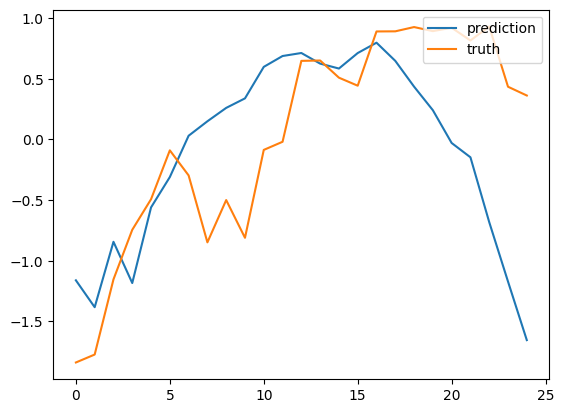

In [ ]:
pyplot.plot(df)
pyplot.legend(['prediction', 'truth'], loc='upper right')
pyplot.show()


In [ ]:
train_x.shape

(531, 12, 4)

In [ ]:
train_y = scalerY.inverse_transform(train_y)

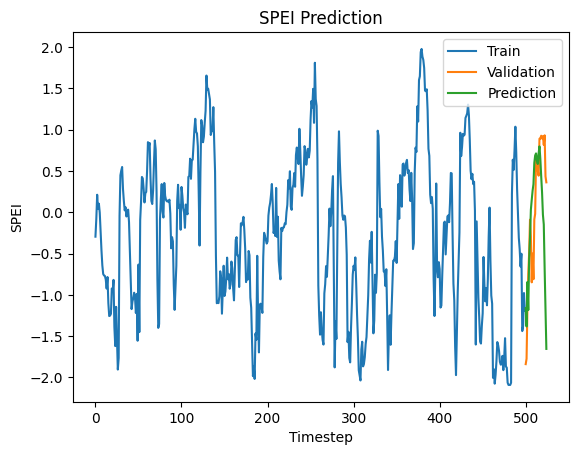

In [ ]:
#plot the result

pyplot.title('SPEI Prediction')
pyplot.xlabel('Timestep')
pyplot.ylabel('SPEI')
pyplot.plot(train_y, label="Train")
pyplot.plot(range(500, 525), test_y2, label="Validation")
pyplot.plot(range(500, 525), testPredict, label="Prediction")
pyplot.legend(['Train','Validation', 'Prediction'],loc='upper right')
pyplot.show()

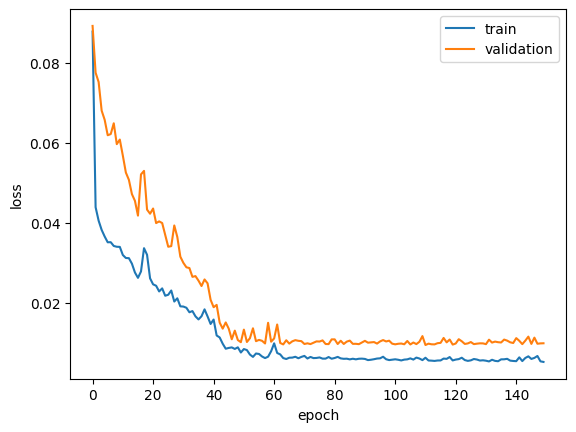

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

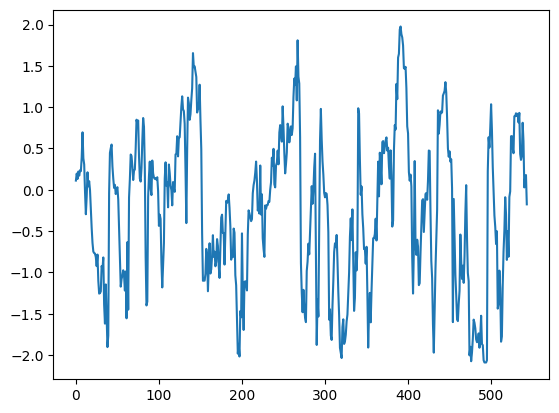

In [ ]:
pyplot.plot(spei_means)

pyplot.show()

In [ ]:
print(testPredict, test_y)

[[0.21474822]
 [0.20911036]
 [0.21208748]
 [0.21729288]
 [0.22407986]
 [0.23008116]
 [0.22957936]
 [0.2332143 ]
 [0.23350574]
 [0.23279558]
 [0.22944634]
 [0.2254352 ]
 [0.22282815]
 [0.2215401 ]
 [0.21892343]
 [0.21584629]
 [0.21377915]
 [0.20579056]
 [0.19641192]
 [0.19038968]] [[0.2700654 ]
 [0.30392263]
 [0.31439315]
 [0.3034853 ]
 [0.30705614]
 [0.31490691]
 [0.32001479]
 [0.28797908]
 [0.29483205]
 [0.31319155]
 [0.30016072]
 [0.27832378]
 [0.25828712]
 [0.27398441]
 [0.24874222]
 [0.28524893]
 [0.31503429]
 [0.28114734]
 [0.29368988]
 [0.28093929]]
